In [1]:

import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import vtk

In [4]:
xhalf = 0.02/2
ymin = 0.01
ymax = 0.02
xcrack = 0.05
ycrack = 0.01
n = 32

In [5]:
xarea = np.array([0,0,0.1,0.1,0])
yarea = np.array([0,0.1,0.1,0,0])

In [6]:
xareaPD = np.array([0.04,0.04,0.06,0.06,0.04])
yareaPD = np.array([0.01,0.03,0.03,0.01,0.01])

In [7]:
h = xhalf/n
h
h = (xhalf-h/2) / n
h 

0.0003076171875

In [8]:
delta = 4 * h
delta

0.00123046875

In [9]:
x = []
y = []
volume = []
for j in range(0,int(2*ycrack/h)+1):
    for i in range(0,n+1):
        x.append(0.05-h/2-i*h)
        y.append(0.01+j*h)

for j in range(0,int(2*ycrack/h)+1):
    for i in range(0,n+1):
        x.append(0.05+h/2+i*h)
        y.append(0.01+j*h)
        

for x_, y_ in zip(x,y) :
    if x_ == min(x) or x_ == max(x) or y_ == min(y) or y_ == max(y):
        volume.append(h*h/2)
    else:
        volume.append(h*h)    

In [10]:
amountleft = 0
amountright = 0
miny = min(y)
lineleft = []
lineright = []
for x_, y_ in zip(x,y) :
    if y_ == miny and x_ < 0.05 :
        amountleft += 1
        lineleft.append(x_)
    if y_ == miny and x_ > 0.05 :
        amountright += 1
        lineright.append(x_)

lineleft = np.sort(lineleft)
lineright = np.sort(lineright)

lineleft = np.array(lineleft)
lineright = np.array(lineright)

In [11]:
0.05-h/2-lineleft

array([0.00984375, 0.00953613, 0.00922852, 0.0089209 , 0.00861328,
       0.00830566, 0.00799805, 0.00769043, 0.00738281, 0.0070752 ,
       0.00676758, 0.00645996, 0.00615234, 0.00584473, 0.00553711,
       0.00522949, 0.00492187, 0.00461426, 0.00430664, 0.00399902,
       0.00369141, 0.00338379, 0.00307617, 0.00276855, 0.00246094,
       0.00215332, 0.0018457 , 0.00153809, 0.00123047, 0.00092285,
       0.00061523, 0.00030762, 0.        ])

In [12]:
0.05+h/2-lineright

array([ 0.        , -0.00030762, -0.00061523, -0.00092285, -0.00123047,
       -0.00153809, -0.0018457 , -0.00215332, -0.00246094, -0.00276855,
       -0.00307617, -0.00338379, -0.00369141, -0.00399902, -0.00430664,
       -0.00461426, -0.00492187, -0.00522949, -0.00553711, -0.00584473,
       -0.00615234, -0.00645996, -0.00676758, -0.0070752 , -0.00738281,
       -0.00769043, -0.00799805, -0.00830566, -0.00861328, -0.0089209 ,
       -0.00922852, -0.00953613, -0.00984375])

In [13]:
z = np.linspace(0,1,len(lineleft))

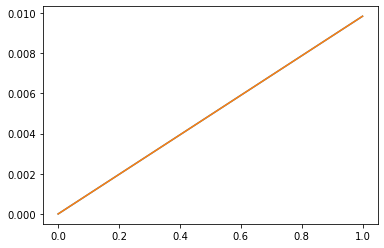

In [14]:
plt.plot(z,np.sort(abs(0.05-h/2-lineleft)))
plt.plot(z,abs(0.05+h/2-lineright))

In [15]:
amountleft

33

In [16]:
amountright

33

In [17]:
min(x)

0.040002441406250006

In [18]:
max(x)

0.05999755859375

In [19]:
min(y)

0.01

In [20]:
max(y)

0.029995117187500003

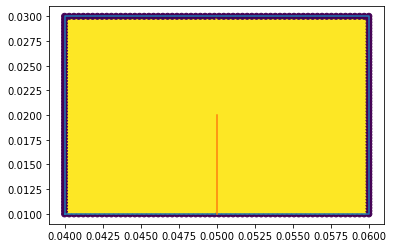

In [21]:
plt.plot(xareaPD,yareaPD)
plt.plot([0.05,0.05],[0.01,0.02])
plt.scatter(x,y,c=volume)

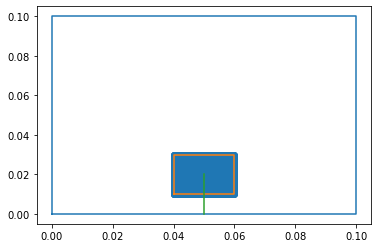

In [22]:
plt.plot(xarea,yarea)
plt.plot(xareaPD,yareaPD)
plt.plot([0.05,0.05],[0,0.02])
plt.scatter(x,y)

In [23]:
writer = vtk.vtkXMLUnstructuredGridWriter()
writer.SetFileName("coupling_"+str(n)+".vtu")
grid = vtk.vtkUnstructuredGrid()
points = vtk.vtkPoints()
points.SetNumberOfPoints(len(x))
points.SetDataTypeToDouble()

for i in range(0,len(x)):
    points.InsertPoint(i,x[i],y[i],0.)
    
grid.SetPoints(points)


dataOut = grid.GetPointData()
array = vtk.vtkDoubleArray()
array.SetName("Volumes")
array.SetNumberOfComponents(1)
array.SetNumberOfTuples(len(x))

for i in range(0,len(x)):
    array.SetTuple1(i,volume[i])
dataOut.AddArray(array)


writer.SetInputData(grid)
writer.GetCompressor().SetCompressionLevel(0)
writer.SetDataModeToAscii()
writer.Write()

1

In [24]:
%%bash 
ls

Construct-aligned-mesh-example1.ipynb
Construct-aligned-mesh-example2.ipynb
coupling_128.vtk
coupling_128.vtu
coupling_16.vtk
coupling_16.vtu
coupling_32_pum.vtk
coupling_32_pum.vtu
coupling_32.vtk
coupling_32.vtu
coupling_64.vtk
coupling_64.vtu
input.yaml
out-coarse


In [25]:
import meshio

In [26]:
points = []
cells = []
for i in range(0,len(x)):
    points.append([x[i],y[i],0])
    cells.append(("vertex", [[i]]))

In [27]:
mesh = meshio.Mesh(
    points,
    cells,
    # Optionally provide extra data on points, cells, etc.
    point_data={"Volume": volume},
    # Each item in cell data must match the cells array
)
mesh.write(
    "coupling_"+str(n)+".vtk",  # str, os.PathLike, or buffer/open file
    # file_format="vtk",  # optional if first argument is a path; inferred from extension
)

In [28]:
%%bash 
ls

Construct-aligned-mesh-example1.ipynb
Construct-aligned-mesh-example2.ipynb
coupling_128.vtk
coupling_128.vtu
coupling_16.vtk
coupling_16.vtu
coupling_32_pum.vtk
coupling_32_pum.vtu
coupling_32.vtk
coupling_32.vtu
coupling_64.vtk
coupling_64.vtu
input.yaml
out-coarse


In [29]:
mesh = meshio.read(
    "coupling_"+str(n)+".vtk",  # string, os.PathLike, or a buffer/open file
    # file_format="stl",  # optional if filename is a path; inferred from extension
    # see meshio-convert -h for all possible formats
)